<h1 style="font-family:verdana;"> <center>Smart Phone Price Prediction</center> </h1>
<p><center style="color:#159364; font-family:cursive;">EDA </center></p>
<center style="color:#159364; font-family:cursive;">Peace </center></p>

***

<div style='color: #216969;
           background-color:#EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏗️Import Necessary Libraries
<a class="anchor" id="2"></a> 

In [42]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📥Importing the Dataset<a class="anchor" id="3"></a> 

In [43]:

mobile_df = pd.read_csv(r"mobile_finaldata.csv")
mobile_df.head()

,Company,model_name,color_group,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Galaxy F13,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,C50,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,C50,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,10,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,10,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299


In [44]:
# Checking the Datatypes of the columns
mobile_df.dtypes

Company                object
model_name             object
color_group            object
Stars                 float64
Num_Ratings             int64
Num_Reviews             int64
Ram                    object
Storage                object
Expandable             object
processor_category     object
display_inches        float64
Num_camera              int64
battery_mah             int64
Price                   int64
dtype: object

In [45]:
# Statistical description of the Dataset
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Stars,661.0,4.292436,0.196493,3.0,4.20,4.30,4.40,4.70
Num_Ratings,661.0,40642.299546,74138.061990,9.0,1141.00,6165.00,45027.00,577732.00
Num_Reviews,661.0,2838.470499,4989.908085,1.0,84.00,544.00,3602.00,33897.00
display_inches,661.0,16.582738,0.572281,12.7,16.51,16.66,16.76,17.65
Num_camera,661.0,2.234493,0.968170,0.0,1.00,2.00,3.00,4.00
battery_mah,661.0,4967.338880,483.369104,3000.0,5000.00,5000.00,5000.00,7000.00
Price,661.0,20453.042360,19469.899443,4699.0,9990.00,13999.00,19999.00,127999.00


In [46]:
# 'isnull().sum()' returns the number of missing values in each variable
Total = mobile_df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# the variable with highest percentage of missing values will appear first
Percent = (mobile_df.isnull().sum()*100/mobile_df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = mobile_df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
Company,0,0.0,object
model_name,0,0.0,object
color_group,0,0.0,object
Stars,0,0.0,float64
Num_Ratings,0,0.0,int64
Num_Reviews,0,0.0,int64
Ram,0,0.0,object
Storage,0,0.0,object
Expandable,0,0.0,object
processor_category,0,0.0,object


In [47]:
# Replacing the repeated typo errors
mobile_df.Company.replace({"realme":"Realme","Redmi":"REDMI","Motorola":"MOTOROLA","oppo":"OPPO"},inplace=True)

In [48]:
import plotly.express as px
import pandas as pd

# Assuming mobile_df is your DataFrame

company_counts = mobile_df['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']

fig = px.bar(company_counts, x='Company', y='Count', color='Company',
             title='Barplot of the Company Variable')

fig.show()

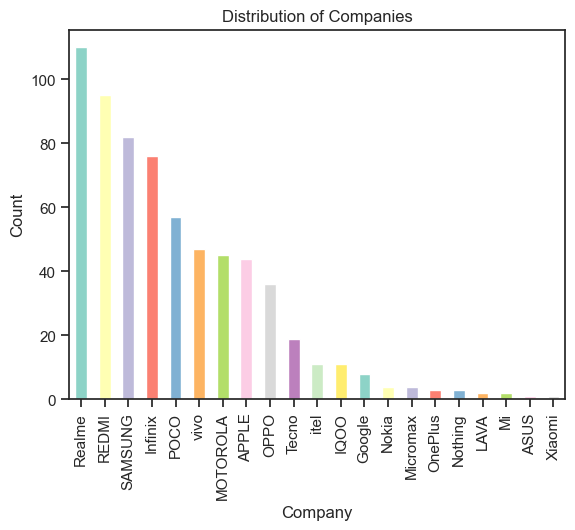

In [66]:
# Define a color palette
colors = sns.color_palette("Set3")

# Plot the bar chart with the specified color palette
mobile_df.Company.value_counts().plot(kind="bar", color=colors)

# Add labels and title
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Distribution of Companies")

# Display the plot
plt.show()

From this barplot we see that there are 16 companies with `Realme` having the most number of smartphone models and `Xiaomi` having least number of Smartphone phones.

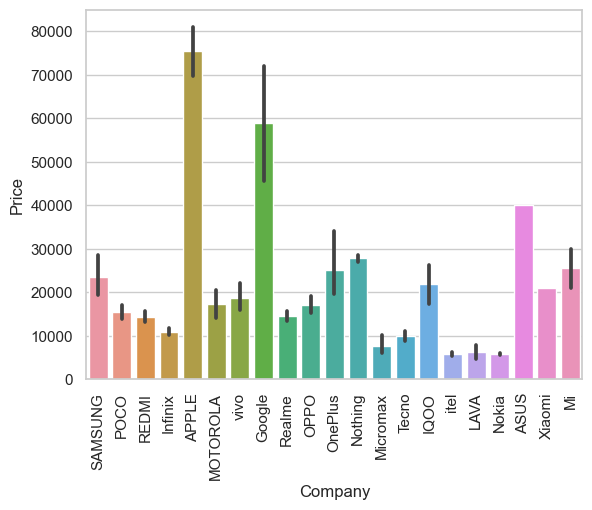

In [49]:
# Since price is the target variable lets take a look at the distribution of Price for each of the companies

sns.barplot(x="Company",y="Price",data=mobile_df)
plt.xticks(rotation='vertical')
plt.show();

From this barplot we come to know that `Apple` company's martphones are the most expensive with prices in the range of `60,000 Rs. - 80,000 Rs.`  
Companies like Google, Samsung, Poco, Redmi, Infinix, Motoerola roll out budget phones in the range of `20,000 Rs. - 60,000 Rs.`

In [67]:
company_ratings = mobile_df.groupby("Company")["Stars"].max()

# Sort the ratings in descending order
company_ratings = company_ratings.sort_values(ascending=False)

# Get the company with the highest rating
top_company = company_ratings.index[0]

# Filter the DataFrame for the top-rated company
filtered_df = mobile_df[mobile_df["Company"] == top_company]

# Create a custom color sequence
colors = ["#FFA07A", "#7B68EE", "#00CED1", "#FFD700", "#32CD32"]

# Create the bar plot using Plotly
fig = go.Figure(data=go.Bar(
    x=filtered_df["model_name"],
    y=filtered_df["Stars"],
    marker=dict(color=colors)
))

# Customize the layout
fig.update_layout(
    title=f"Highest Rated Company: {top_company}",
    xaxis=dict(title="Model Name"),
    yaxis=dict(title="Stars Rating"),
    showlegend=False
)

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

From this Graph we come to know that the Highest rating of all the companies is given to `Apple`, with the highest rated model being all the colour variants of `IPhone 14 IPhone 13`

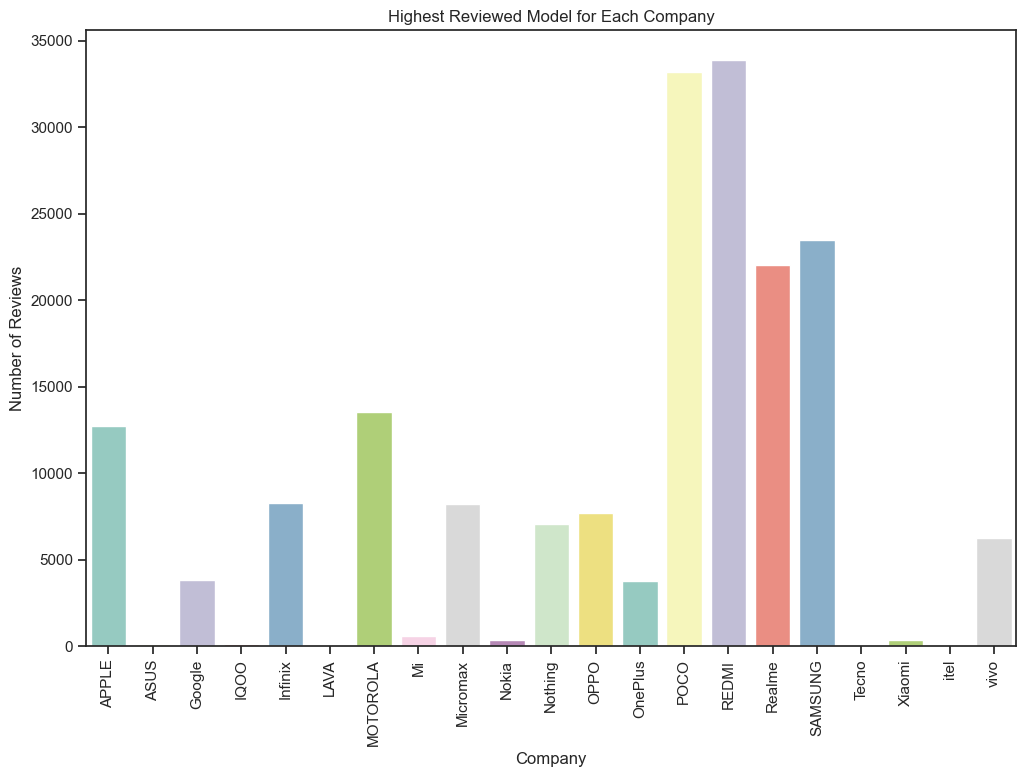

In [71]:
# Group by company and find the highest reviewed models
grouped_df = mobile_df.groupby("Company")
highest_reviewed_models = grouped_df.apply(lambda x: x.sort_values("Num_Reviews", ascending=False).iloc[0])
highest_reviewed_df = pd.DataFrame(highest_reviewed_models)

# Define a color palette
colors = sns.color_palette("Set3")

# Create the bar plot using seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="Company", y="Num_Reviews", data=highest_reviewed_df, palette=colors, ax=ax)

# Customize the plot
ax.set_xlabel("Company")
ax.set_ylabel("Number of Reviews")
ax.set_title("Highest Reviewed Model for Each Company")
ax.set_xticklabels(highest_reviewed_df["Company"], rotation=90)

# Show the plot
plt.show()

The most Reviewed Models are of the companies like `POCO, REDMI, REALME, SAMSUNG` which indicate they are the most popular and sought after brands  in the market.

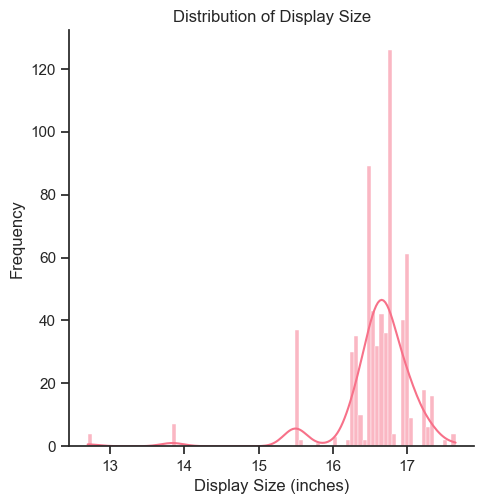

In [72]:
colors = sns.color_palette("husl")

# Create the distribution plot using seaborn
sns.set(style="ticks")
sns.displot(mobile_df.display_inches, kde=True, color=colors[0])

# Customize the plot
plt.xlabel("Display Size (inches)")
plt.ylabel("Frequency")
plt.title("Distribution of Display Size")

# Remove spines
sns.despine()

# Show the plot
plt.show()

From this we can say that mobiles which have a screen size of `16cm and 17 cm` are more frequent as compared to the others.

**Corelation matrix**

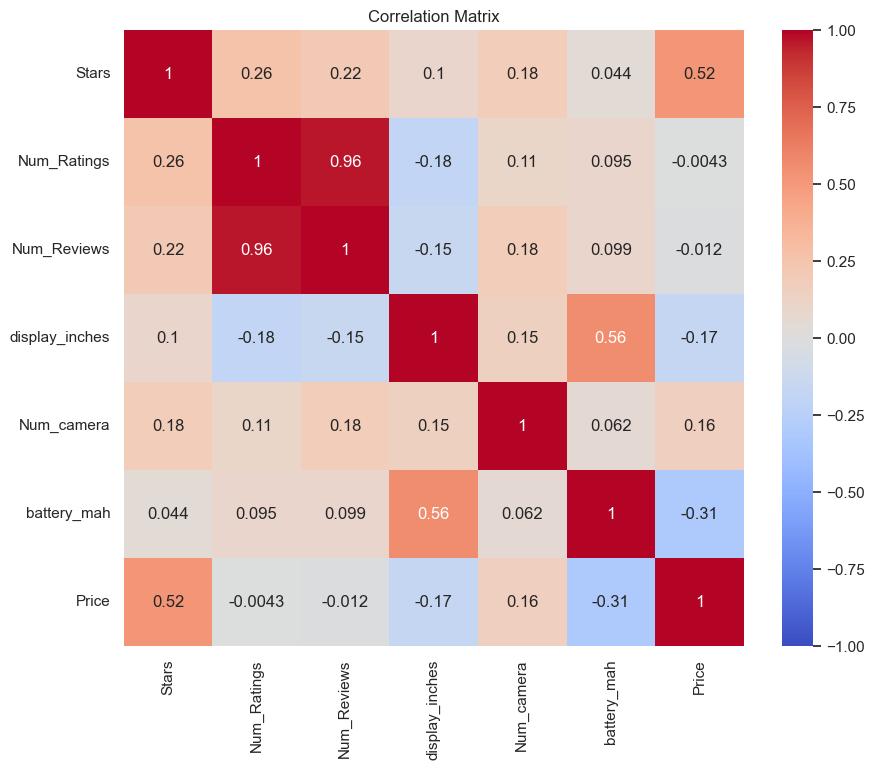

In [64]:
corr_df = mobile_df[['Stars', 'Num_Ratings', 'Num_Reviews', 'Ram', 'Storage', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]
corr_matrix = corr_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

**Inferences derived from the Heatmap**

<ul>
<li>There is a strong positive correlation between the number of ratings and the number of reviews, which makes sense since more popular phones are likely to have more reviews.</li>
<li>There is a moderate positive correlation between the price of the phone and RAM, which suggests that higher-end phones tend to have more RAM.</li>`
<li>There is a weak positive correlation between the display size and battery capacity, which suggests that larger screens may require more battery power.</li>
<li>There is no strong correlation between any other pairs of variables, suggesting that they are largely independent of each other.</li>
</ul>

**Pairplot of the Dataset**

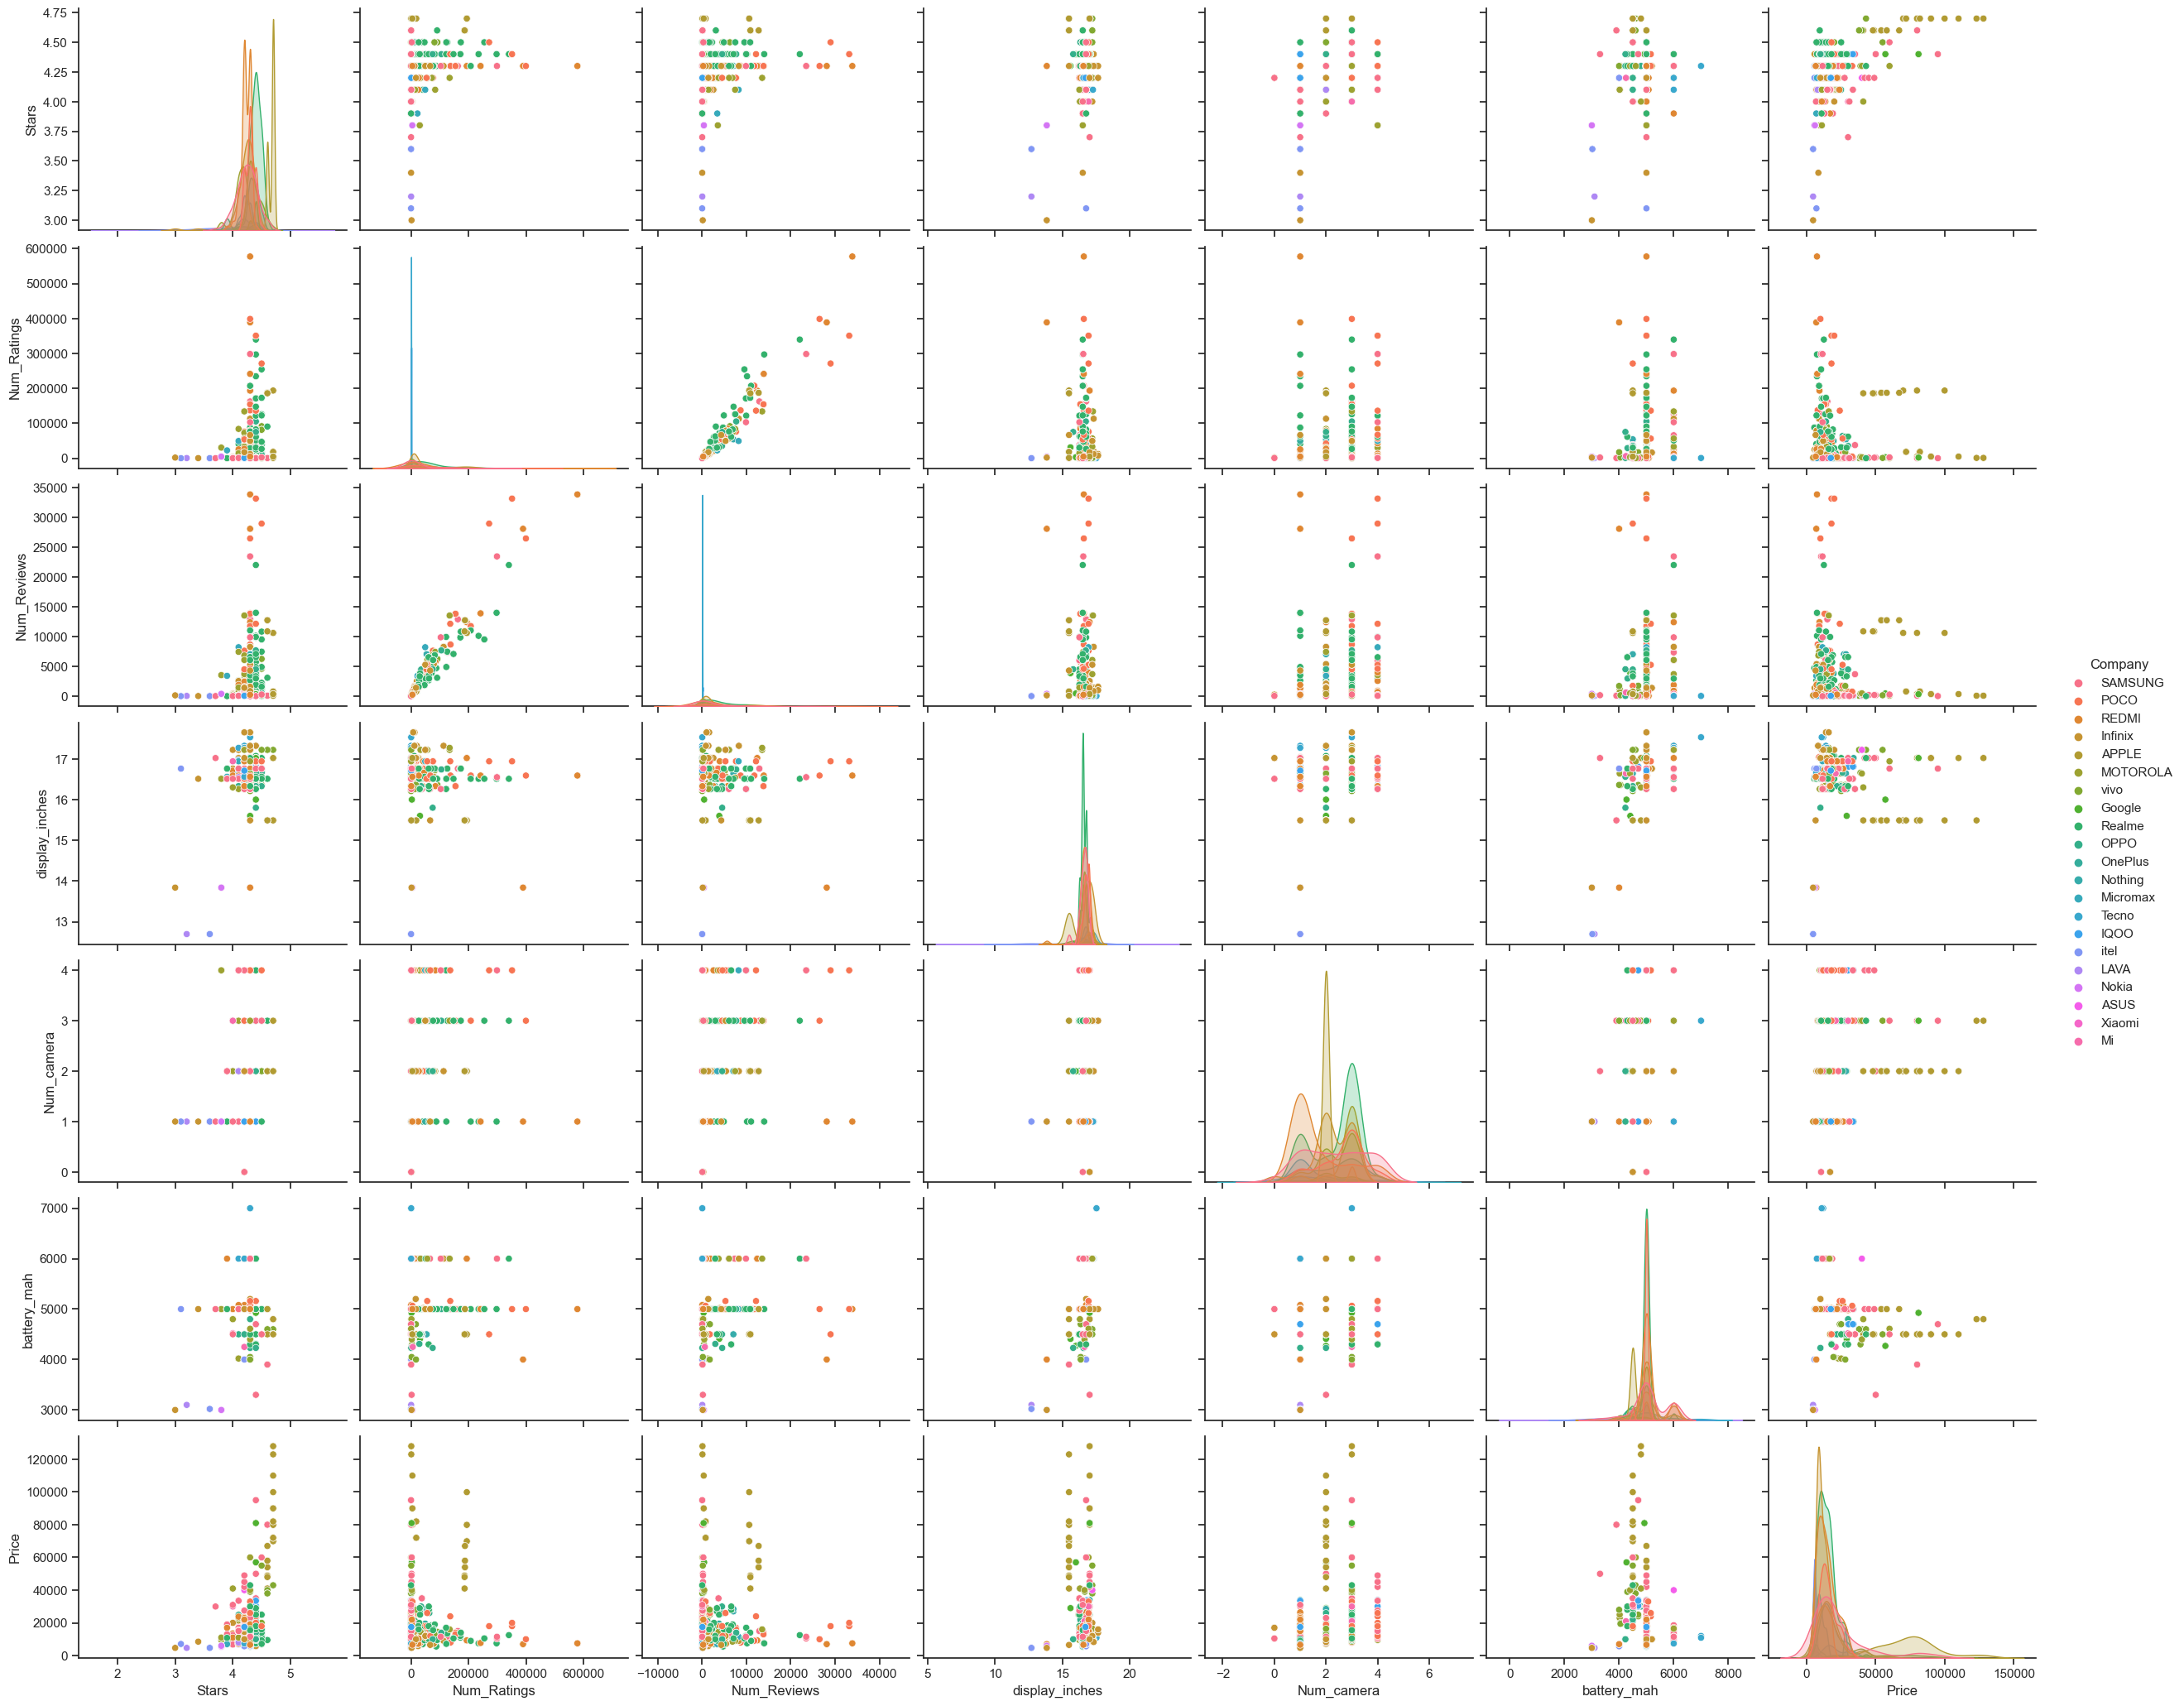

In [65]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(mobile_df, hue="Company", diag_kind="kde", height=3, aspect=1.2)

**Inferences derived from the pairplot**

<ul>
<li>There appears to be a strong positive correlation between the number of ratings and the number of reviews, as indicated by the dense cluster of points in the top-right corner of the scatterplot matrix.</li>
<li>Phones with higher storage and RAM tend to be more expensive, as indicated by the upward trend in the scatterplot between price, storage, and RAM.</li>
<li>Most phones have a display size between 6 and 7 inches, as shown by the peak in the kernel density estimate in the diagonal plot for display size.</li>
<li>There are some differences between the companies in terms of the distribution of their phone features, particularly in terms of battery capacity, display size, and price.</li>
</ul>

There are many other plots that can be made in order to get a better understanding of the data.  
But as of now I have derived enough insights from the data to build a model which would help us,   
to predict the price of a new mobile on the basis of the historical data on the specifications and public reviews.  